# Tanmay Bapu Chavan
# Hamoye HDSC - Stage E

# Practical Time Series Analysis & Forecast
Objective - Build forecasting models for measurement of electricity of District given the total amount of Electricity consumed in that District from 2010 to 2021.

Data Set Information:
The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

Attribute Information:

FullDate: Date in format yyyy-mm-dd hh:mm:ss ElecPrice: Prices of electricity charged in Kw per hour Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T SysLoad: Total Load on system or Power consumed at time-T Tmax: maximum temperature at time-T

Notes:

The dataset is sampled on an hourly basis. It has the following features.
Link for the dataset : https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
from datetime import datetime

In [2]:
# Loading the dataset
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
#dataset preview
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info

<bound method DataFrame.info of                   FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]>

In [5]:
df.shape

(92016, 5)

In [6]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

We need to convert 'FullDate' to a time series object i.e convert to 'DateTime'

In [9]:
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

Also renamaing the columns FullDate as 'ds'

In [10]:
df = df.rename(columns={"FullDate" : "ds" }) 
df.set_index('ds', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


**Question 11**

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time? 

In [11]:
df = df.resample('D').sum()

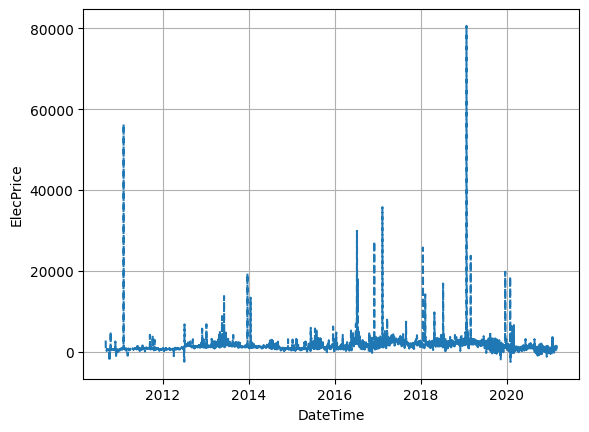

In [12]:
plt.plot(df.index, df.ElecPrice, '--')
plt.xlabel('DateTime')
plt.ylabel('ElecPrice')
plt.grid()
plt.show()

**Question 12**

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [13]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['SysLoad'])
print(f'The p-value of SysLoad = : {round(adf_test[1],6)}')

adf_test = adfuller(df['GasPrice'])
print(f'The p-value of GasPrice =: {round(adf_test[1],6)}')
     

The p-value of SysLoad = : 0.004254
The p-value of GasPrice =: 0.045027


**Question 13**

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [14]:
#ElecPrice
print('ElecPrice')
adf_test = adfuller(df['ElecPrice'])
print('Augmented Dicky Fuller test result: ',{adf_test[0]})
print('Critical Values:')

for a,b in adf_test[4].items():
 print(f'{a} : {round(b,4)}')

ElecPrice
Augmented Dicky Fuller test result:  {-8.269053866873792}
Critical Values:
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [15]:

#GasPrice
print('GasPrice')
adf_test = adfuller(df['GasPrice'])
print('Augmented Dicky Fuller test result:', {adf_test[0]})
print('Critical Values :')

for a, b in adf_test[4].items():
 print(f'{a} : {round(b,4)}')

GasPrice
Augmented Dicky Fuller test result: {-2.902766697165175}
Critical Values :
1% : -3.4321
5% : -2.8623
10% : -2.5672


**Further Instructions (14-16)**

Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [16]:
df_daily = df.reset_index()
df_daily.head()

,ds,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


Creating a new dataframe 'df_model' to build a predictive model. For this we will select two colmns ds and ElecPrice

In [17]:
df_model = df_daily[['ds', 'ElecPrice']]

Renaming the columns ElecPrice as 'y'.

y is our target variable

In [18]:
df_model = df_model.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})
df_model.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


Train-Test-Split process of data. Here the length of the dataset mentioned is 2757

In [19]:
train = df_model[:2757]
test = df_model[2757:]
     
print('Training data shape', train.shape)
print('Testing data shape', test.shape)

Training data shape (2757, 2)
Testing data shape (1077, 2)


In [20]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

**Using Facebook Prophet to train a Univariate time series model**

In [21]:
from fbprophet import Prophet
model = Prophet() 
model.fit(train[['ds', 'y']])

ModuleNotFoundError: No module named 'fbprophet'

test_pred = test[['ds']]
forecast = model.predict(test_pred)
forecast.head()

**QUESTION 14**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places? Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [ ]:

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test.y, forecast.yhat) * 100
print("The MAPE is :",round(mape,2))

Question 15

What is the RMSE in 2 decimal places?

In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.y, forecast.yhat))
print("The MAPE is :", round(rms,2))


Question 16

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

In [ ]:

model.plot_components(forecast)
plt.show()

Further Instructions (17-19)
Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

In [ ]:
df_daily.head()

In [ ]:
df_daily.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace = True)

In [ ]:
df_train = df_daily[['ds', 'SysLoad', 'Tmax', 'GasPrice', 'y']]

In [ ]:
# assign train and test data
train1 = df_train[:2757]
test1 = df_train[2757:]

In [ ]:
df_test_pred = test1[['ds', 'SysLoad', 'Tmax', 'GasPrice']]
forecast2 = model2.predict(df_test_pred)

Question 17

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [ ]:

from sklearn.metrics import mean_absolute_percentage_error

mape1 = mean_absolute_percentage_error(test1.y, forecast2.yhat) * 100
round(mape1,2)

What is the RMSE in 2 decimal places?

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test1.y, forecast2.yhat))
round(rms,2)

In [ ]:
model2.plot_components(forecast2)
plt.show()